In [68]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1) Load the training data into feature matrix, class labels, and event ids:

In [69]:
from proj1_helpers import *
from helpers import *
from data_modification import replace_by_mean


""" Load TRAINING data """
DATA_TRAIN_PATH = '/Users/chiara/Documents/EPFL/Master/Ma1/MachineLearning/project1/data/train.csv'
y, raw_tx, ids = load_csv_data(DATA_TRAIN_PATH)
y = np.reshape(y, (len(y),1))
y[y == -1] = 0


# Replace -999 by the mean of its respective column
processed_tx = replace_by_mean(raw_tx)

# Standardize (subtract mean and divive by standard deviation)
processed_tx, mean_x, std_x = standardize(processed_tx)


""" Load TEST data """
DATA_TEST_PATH = '/Users/chiara/Documents/EPFL/Master/Ma1/MachineLearning/project1/data/test.csv' # download test data and supply path here 
_, raw_tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

processed_tx_test = replace_by_mean(raw_tX_test)
processed_tx_test = standardize_test(processed_tx_test, mean_x, std_x)

## Logistic Regression

In [67]:
from helpers import split_data
from proj1_helpers import predict_labels_LR
from implementations import logistic_regression
from feature_transformation import build_poly_matrix, add_cos_function, add_exp_function

tx = np.copy(processed_tx)
x_poly = build_poly_matrix(tx,1)
x_poly = add_cos_function(x_poly)

ratio = 0.9
x_train, y_train, x_test, y_test = split_data(x_poly, np.copy(y), ratio)

gamma = 0.0001
max_iters = 100
initial_w = np.zeros((tx.shape[1], 1))
w, loss = logistic_regression(y_train, x_train, initial_w, max_iters, gamma)
y_pred = predict_labels_LR(w, x_test)
y_pred[y_pred == -1] = 0

same = y_pred == y_test
correct_rate = np.sum(same)/ len(y_test)
correct_rate*100

Current iteration=0, the loss=0.6931471805599454


0.70999999999999996

### prepare for submission

In [159]:
tx_test = np.copy(processed_tx_test)
import datetime
now = datetime.datetime.now()
now_str = now.strftime("%d-%m-%Y_%Hh%M_%S")
OUTPUT_PATH = '/Users/chiara/Documents/EPFL/Master/Ma1/MachineLearning/project1/data/predictions-%s-group-36.csv' % now_str
y_pred = predict_labels_LR(weights, tx_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

## Regular Reg_logistic regression

In [103]:
from cross_validation_RLR import run_reg_logistic_regression
from implementations import reg_logistic_regression
from feature_transformation import add_cos_function, add_exp_function

tx = np.copy(processed_tx)
x_poly = build_poly_matrix(tx,1)
x_poly = add_cos_function(x_poly)
gamma = 0.0001  
max_iters = 500
lambda_ = 0.01
initial_w = np.random.rand(tx.shape[1], 1)

ratio = 0.9
x_train, y_train, x_test, y_test = split_data(x_poly, np.copy(y), ratio)

w, loss = reg_logistic_regression(y_train, x_train, lambda_, initial_w, max_iters, gamma)
y_pred = predict_labels_LR(w, x_test)
y_pred[y_pred == -1] =0

same = y_pred == y_test
correct_rate = np.sum(same)/ len(y_test)
correct_rate*100

Current iteration=0, the loss=0.6931471805599454
Current iteration=10, the loss=0.5515608522570421
Current iteration=20, the loss=0.5190588182173975
Current iteration=30, the loss=0.5181941288746118
Current iteration=40, the loss=0.5007412868215807
Current iteration=50, the loss=0.5002613425970086
Current iteration=60, the loss=0.49969135544333476
Current iteration=70, the loss=0.4958034111335424
Current iteration=80, the loss=0.48607089865576736
Current iteration=90, the loss=0.4899552783529248
Current iteration=100, the loss=0.5149470526553287
Current iteration=110, the loss=0.5014283599587253
Current iteration=120, the loss=0.4928083304296974
Current iteration=130, the loss=0.4828825912559261
Current iteration=140, the loss=0.49035983877388245
Current iteration=150, the loss=0.49495231035316123
Current iteration=160, the loss=0.521871712669907
Current iteration=170, the loss=0.48251419509687693
Current iteration=180, the loss=0.48949336939087634
Current iteration=190, the loss=0.476

79.644000000000005

Current iteration=0, the loss=42.28197801415666
Current iteration=10, the loss=40.61117769240622
Current iteration=20, the loss=39.45976652972891
Current iteration=30, the loss=38.81727928046642
Current iteration=40, the loss=38.271252448427745
Current iteration=50, the loss=37.57052717861526
Current iteration=60, the loss=37.32753024667694
Current iteration=70, the loss=37.377408366497946
Current iteration=80, the loss=37.07799850992263
Current iteration=90, the loss=37.09468037816237
Current iteration=100, the loss=37.062522478600975
Current iteration=110, the loss=36.36086735903675
Current iteration=120, the loss=36.79079280315902
Current iteration=130, the loss=36.53801667485482
Current iteration=140, the loss=37.15821454315969
Current iteration=150, the loss=37.321101389748314
Current iteration=160, the loss=36.08923912542568
Current iteration=170, the loss=36.612941267472024
Current iteration=180, the loss=36.50659661082027
Current iteration=190, the loss=37.014509445958204
Curre

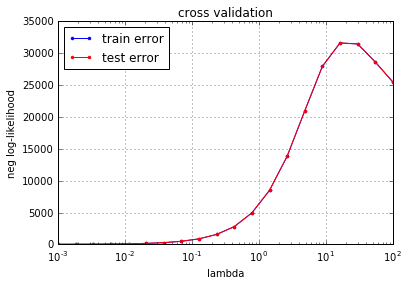

In [106]:
from cross_validation_RLR import run_reg_logistic_regression
from implementations import reg_logistic_regression
tx = np.copy(processed_tx)
x_poly = build_poly_matrix(tx,1)
x_poly = add_cos_function(x_poly)
initial_w = np.random.rand(tx.shape[1], 1)

#degree =1:
#gamma = 0.0001
#iter = 500

#cos : 
# lambda_ = 0.01
# gamma = 0.001
# iter = 500

run_reg_logistic_regression(x_poly, np.copy(y), initial_w, 0.0001, 500, filename= "reg_log_regr_cos")

## 4) Generate predictions and save ouput in csv format for submission:

In [89]:
import datetime
now = datetime.datetime.now()
now_str = now.strftime("%d-%m-%Y_%Hh%M_%S")
OUTPUT_PATH = '/Users/chiara/Documents/EPFL/Master/Ma1/MachineLearning/project1/data/predictions-%s-group-36.csv' % now_str
y_pred = predict_labels(weights, tx_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)